In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

In [20]:
df=pd.read_csv('Company_Data.csv')

In [21]:
df.shape

(400, 11)

In [22]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

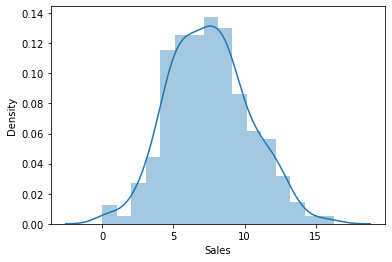

In [23]:
sns.distplot(df.Sales)

In [24]:
def sales(i) :
    if i <= 5 :
        i='Low'
    elif i>5 and i <=10:
        i='Medium'
    else:
        i='High'
    return i

In [25]:
df['Sales']=df['Sales'].apply(sales)

In [26]:
df['Sales'].value_counts()

Medium    245
High       78
Low        77
Name: Sales, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [28]:
df.dtypes

Sales          object
CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
dtype: object

In [29]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [30]:
print('US')
print(df.US.value_counts())
print('-----------------------------------------')
print('Urban')
print(df.Urban.value_counts())
print('-----------------------------------------')
print('ShelveLoc')
print(df.ShelveLoc.value_counts())
print('-----------------------------------------')
print('Sales')
print(df['Sales'].value_counts())

US
Yes    258
No     142
Name: US, dtype: int64
-----------------------------------------
Urban
Yes    282
No     118
Name: Urban, dtype: int64
-----------------------------------------
ShelveLoc
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
-----------------------------------------
Sales
Medium    245
High       78
Low        77
Name: Sales, dtype: int64


In [31]:
print('US')
print(df.groupby('US')['Sales'].value_counts())
print('-----------------------------------------')
print('Urban')
print(df.groupby('Urban')['Sales'].value_counts())
print('-----------------------------------------')
print('ShelveLoc')
print(df.groupby('ShelveLoc')['Sales'].value_counts())
print('-----------------------------------------')

US
US   Sales 
No   Medium     96
     Low        32
     High       14
Yes  Medium    149
     High       64
     Low        45
Name: Sales, dtype: int64
-----------------------------------------
Urban
Urban  Sales 
No     Medium     74
       High       22
       Low        22
Yes    Medium    171
       High       56
       Low        55
Name: Sales, dtype: int64
-----------------------------------------
ShelveLoc
ShelveLoc  Sales 
Bad        Medium     51
           Low        41
           High        4
Good       High       46
           Medium     37
           Low         2
Medium     Medium    157
           Low        34
           High       28
Name: Sales, dtype: int64
-----------------------------------------


In [32]:

cat=[i for i in df.columns if df[i].dtype=='object']
print(cat)
num=[i for i in df.columns if df[i].dtype=='int64' or df[i].dtype==  'float64']
print(num)

['Sales', 'ShelveLoc', 'Urban', 'US']
['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


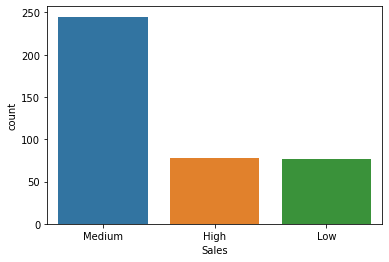

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


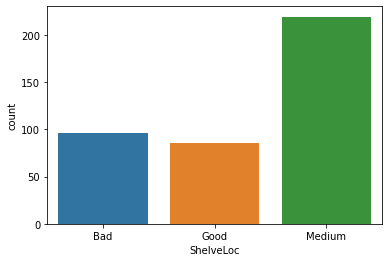

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


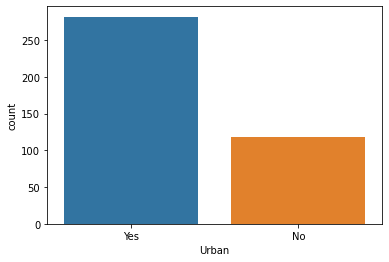

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


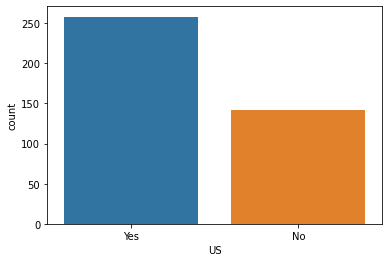

In [33]:
for i in cat:
    sns.countplot(df[i])
    plt.show()

In [34]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot:>

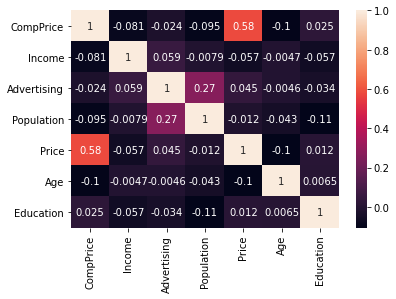

In [35]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in cat:
    df[i]=le.fit_transform(df[i])

__Applied Standard scaler but It haven't produce any change in accuracy of model.__

In [37]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


In [38]:
x=df.iloc[:,1:]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [39]:
y=df.Sales
y

0      2
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: Sales, Length: 400, dtype: int32

In [40]:
y.value_counts()

2    245
0     78
1     77
Name: Sales, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

xtrain, xtest , ytrain , ytest = train_test_split(x,y, test_size=0.2,random_state=8)

# Hyperparameter Tuning

In [42]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(xtrain,ytrain)
pred=clf.predict(xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, pred)

0.6375

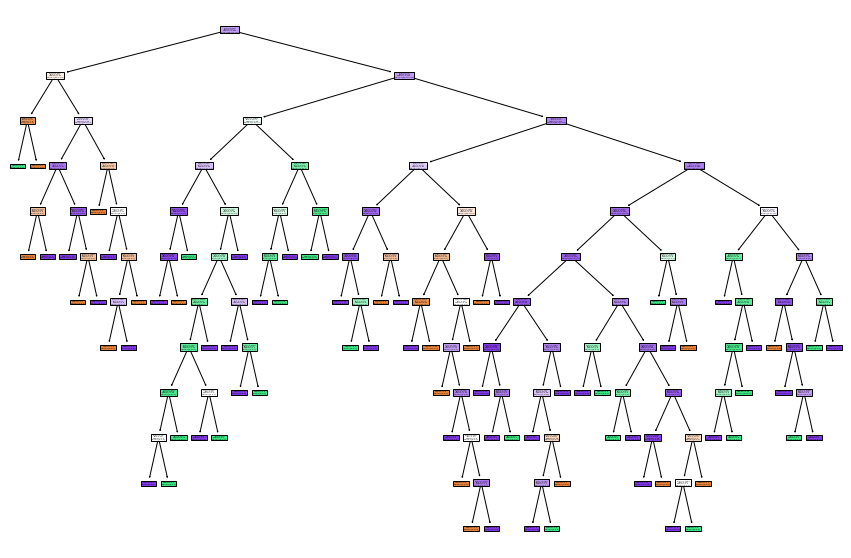

In [43]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True);

In [44]:
path = clf.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [45]:
ccp_alphas

array([0.        , 0.00267857, 0.00288462, 0.00291667, 0.00305556,
       0.003125  , 0.00416667, 0.00416667, 0.00416667, 0.00416667,
       0.00416667, 0.00428571, 0.00461538, 0.0046875 , 0.0046875 ,
       0.0046875 , 0.005     , 0.005     , 0.00520833, 0.00539216,
       0.00546875, 0.00549479, 0.00555556, 0.00566406, 0.00572917,
       0.00576923, 0.00596591, 0.00606618, 0.00635965, 0.00643601,
       0.00761905, 0.00809659, 0.0081786 , 0.00833333, 0.00833333,
       0.00850694, 0.00900735, 0.00926339, 0.01044512, 0.01194568,
       0.01326222, 0.01368093, 0.01592758, 0.01773371, 0.02088347,
       0.02758159])

In [46]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(xtrain, ytrain)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.02758159332598145


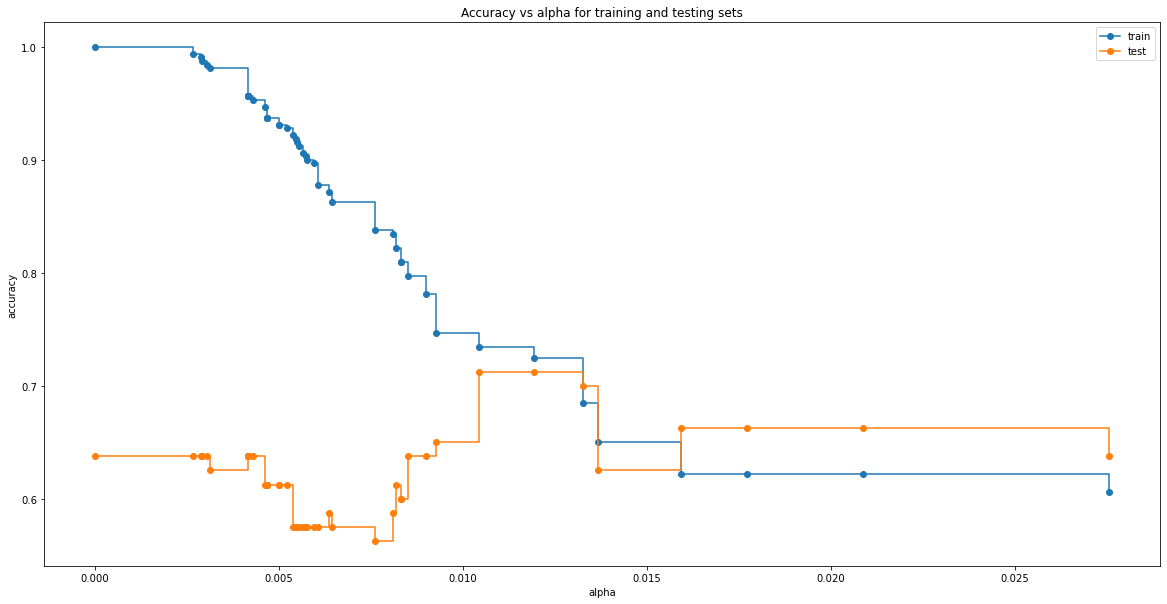

In [47]:
train_scores = [clf.score(xtrain, ytrain) for clf in clfs]
test_scores = [clf.score(xtest, ytest) for clf in clfs]

fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

__Taking the ccp_alpha=0.01044512 .__  
__Here ccp is Cost complexity pruning value which provides another option to control the size of a tree.__

# Final model

In [56]:
model = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=0.01044512)
model.fit(xtrain, ytrain)
pred=model.predict(xtest)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, pred)

0.7125

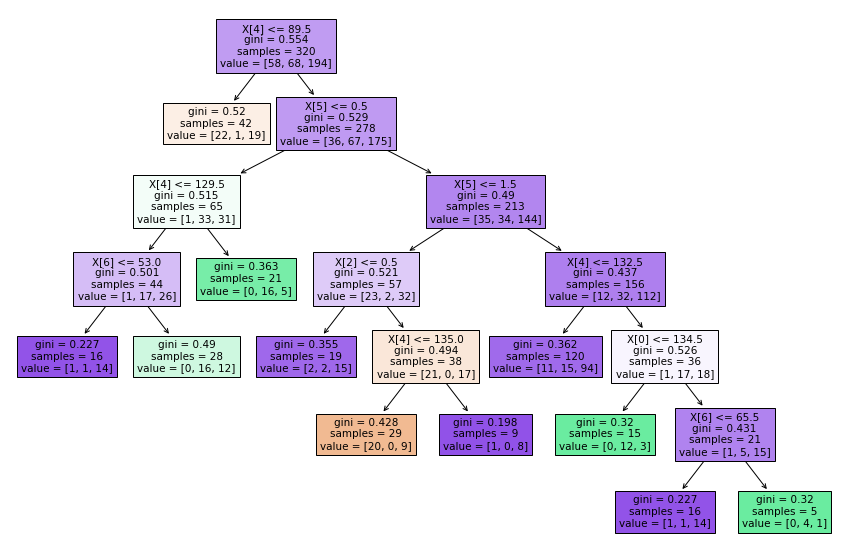

In [52]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True);

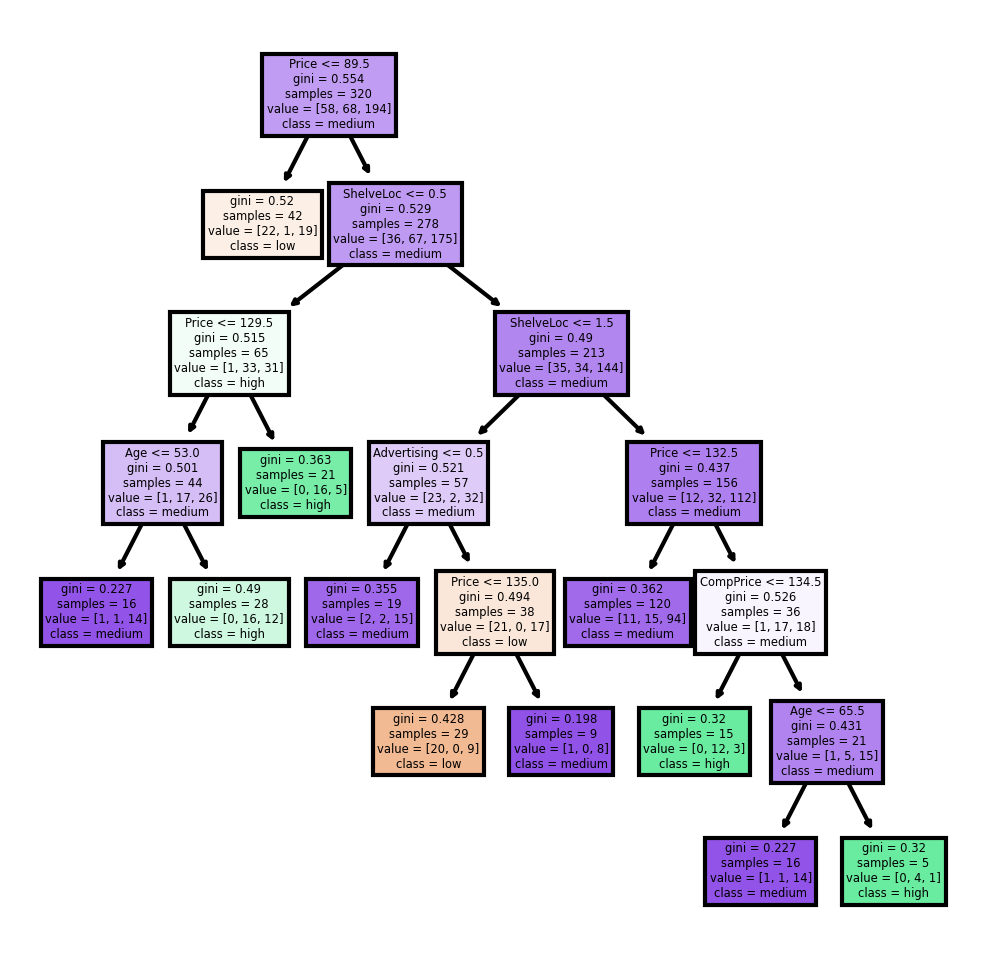

In [53]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['low','high','medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [54]:
pd.crosstab(ytest,pred)

col_0,0,1,2
Sales,,,
0,15,0,5
1,0,4,5
2,4,9,38


In [55]:
# Accuracy 
np.mean(pred==ytest)

0.7125